In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

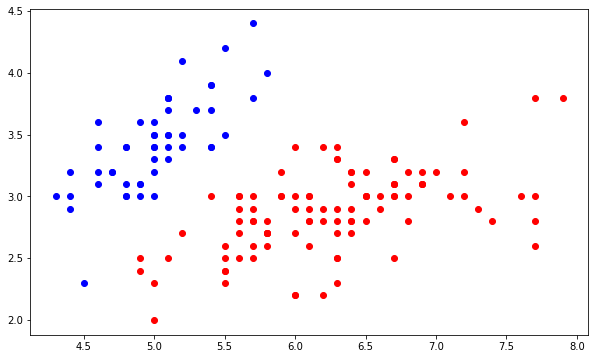

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r')

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iter = 10000, verbose = False):
        self.lr = learning_rate
        self.verbose = verbose
        self.num_iter = num_iter
    
    def __extend_data(self, X):
        extend = np.ones((X.shape[0], 1))
        return np.hstack((extend, X))
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __gradient(self, X, y, y_predict):
        return X.T @ (y_predict - y) / y.size
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        
        self.w = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            y_predict = self.__sigmoid(X@self.w)

            self.w -= self.lr * self.__gradient(X, y, y_predict)

            loss = self.__loss(y_predict, y)

            if(self.verbose == True and i % 10000 == 0):
                print("Iteration: %d - Error: %.4f" %(i, loss))
                
    def predict(self, X):
        return self.__sigmoid(X@self.w)

In [5]:
model = LogisticRegression(learning_rate = 0.1, num_iter = 300000, verbose = True)
model.fit(X,y)

Iteration: 0 - Error: 0.6931
Iteration: 10000 - Error: 0.0403
Iteration: 20000 - Error: 0.0375
Iteration: 30000 - Error: 0.0368
Iteration: 40000 - Error: 0.0366
Iteration: 50000 - Error: 0.0365
Iteration: 60000 - Error: 0.0364
Iteration: 70000 - Error: 0.0364
Iteration: 80000 - Error: 0.0364
Iteration: 90000 - Error: 0.0364
Iteration: 100000 - Error: 0.0364
Iteration: 110000 - Error: 0.0364
Iteration: 120000 - Error: 0.0364
Iteration: 130000 - Error: 0.0364
Iteration: 140000 - Error: 0.0364
Iteration: 150000 - Error: 0.0364
Iteration: 160000 - Error: 0.0364
Iteration: 170000 - Error: 0.0364
Iteration: 180000 - Error: 0.0364
Iteration: 190000 - Error: 0.0364
Iteration: 200000 - Error: 0.0364
Iteration: 210000 - Error: 0.0364
Iteration: 220000 - Error: 0.0364
Iteration: 230000 - Error: 0.0364
Iteration: 240000 - Error: 0.0364
Iteration: 250000 - Error: 0.0364
Iteration: 260000 - Error: 0.0364
Iteration: 270000 - Error: 0.0364
Iteration: 280000 - Error: 0.0364
Iteration: 290000 - Error: 0

In [6]:
preds = model.predict(X)

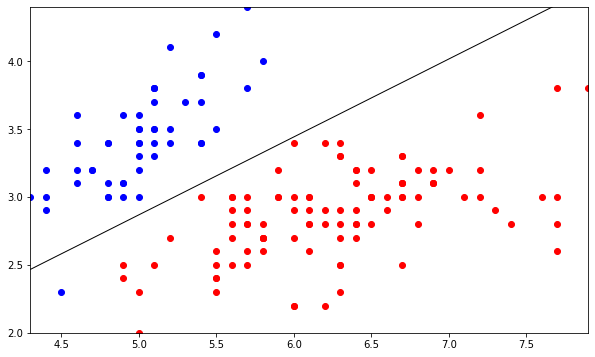

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');